Load the dataset

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import skimage

In [278]:
train = pd.read_csv(f'{os.getcwd()}/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv(f'{os.getcwd()}/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')


In [ ]:


imageSize=50
train_dir = f'{os.getcwd()}/asl-alphabet/asl_alphabet_train/asl_alphabet_train/B'


def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []

    for picture in os.scandir(folder):
        img_file = cv2.imread(picture.path)
        if img_file is not None:
            print("here")
            print("here")
            img_file = np.resize(img_file, (28, 28, 1))
            img_arr = np.asarray(img_file)
 file       plt.imshow(img_file.reshape(28,28))
            X.append(img_arr)

    X = np.asarray(X)

    return X
X_train = get_data(train_dir) 
plt.imshow(X_train[0].reshape(28,28))

In [281]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [282]:
train.shape

(27455, 785)

The data set is given in the form of labels and pixel value ranging from pixel 1 to pixel 784 which is 28 * 28 image.

In [283]:
labels = train['label'].values

In [284]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [285]:
train.drop('label', axis = 1, inplace = True)

We are droping the label coloumn from the training set

Re shaping the images

In [286]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

Since our target variable are in categorical(nomial) so we are using label binarizer

In [287]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [288]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

Lets see how the images look

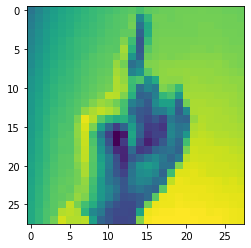

In [289]:
plt.imshow(images[0].reshape(28,28))

Spliting the dataset into train(70%) and test(30%)

In [290]:
from sklearn.model_selection import train_test_split

In [291]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

For deep learning i am using keras library

In [292]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Creating the batch size to 128 and using 50 epochs

In [293]:
batch_size = 128
num_classes = 24
epochs = 50

Normalizing the training and test data

In [294]:
x_train = x_train / 255
x_test = x_test / 255

In [295]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [296]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Visualizing the image after normalizing

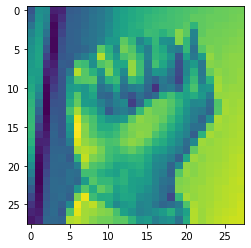

In [297]:
plt.imshow(x_train[0].reshape(28,28))

# CNN Model

In [298]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [299]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [300]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 13s 669us/step - loss: 2.6532 - accuracy: 0.1771 - val_loss: 1.7267 - val_accuracy: 0.4405
Epoch 2/50
19218/19218 [==============================] - 13s 659us/step - loss: 1.3183 - accuracy: 0.5445 - val_loss: 0.8768 - val_accuracy: 0.7018
Epoch 3/50
19218/19218 [==============================] - 12s 624us/step - loss: 0.7775 - accuracy: 0.7297 - val_loss: 0.5595 - val_accuracy: 0.8079
Epoch 4/50
19218/19218 [==============================] - 12s 640us/step - loss: 0.5166 - accuracy: 0.8216 - val_loss: 0.3419 - val_accuracy: 0.8978
Epoch 5/50
19218/19218 [==============================] - 12s 634us/step - loss: 0.3571 - accuracy: 0.8777 - val_loss: 0.2379 - val_accuracy: 0.9360
Epoch 6/50
19218/19218 [==============================] - 13s 658us/step - loss: 0.2527 - accuracy: 0.9200 - val_loss: 0.1638 - val_accuracy: 0.9506
Epoch 7/50
 6528/19218 [=========>....................] -

KeyboardInterrupt: 

Let's validate with the test data

In [242]:
test_labels = test['label']

In [243]:
test.drop('label', axis = 1, inplace = True)

In [244]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [245]:
test_labels = label_binrizer.fit_transform(test_labels)

In [246]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [247]:
test_images.shape

(7172, 28, 28, 1)

Predecting with test images

In [248]:
y_pred = model.predict(test_images)

In [257]:
steps =5
test=model.predict(X_train, steps=steps)
indexes=[]
for each in test:
    indexes.append(np.where(each==1))
print(indexes)

(array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([14]),), (array([

In [250]:
from sklearn.metrics import accuracy_score

In [251]:
accuracy_score(test_labels, y_pred.round())

0.8324037925264919